# **Getting Started with Spark (Pyspark)**

Last week, we covered the introduction to spark and some its characteristics. This week we will get you set up with Spark on google colab and walk you through some simple steps you can take to get started writing your first application. 


***Because we are using the free version of google colab, you have to include steps 1 and 2 in any application you create in order to invoke Spark, in this case, Pyspark since we are using Python. ***

**Step 1: Install Dependencies**
We need to install following components to run pyspark seamlessly:
OpenJDK 8,
Spark Environment,
FindSpark package

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark

**Step 2: Add environment variables**
After installing dependencies, we need to some variables to the environment so that pyspark knows where to look for using dependencies. We can do that using following commands:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.3.0-bin-hadoop3"

**Step 3: Initilize pyspark**
Finally, we just need to initilize pyspark which can be easily achieved using third-party package named findspark as shown below:

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()


'spark-3.3.0-bin-hadoop3'

**You can try running following commands to check if pyspark is properly installed or not:**

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

**You can also check the version of Ppark that is being used by using the command below. **

In [ ]:
spark.version

'3.3.0'

# **Spark’s Directories and Files**

One of the great things about Google Colab is that it is sitting on Unix which makes it very flexible, and gives us the ability to run certain linux/unix commands. for example, we can use the **ls** command to preview our files and directories and **pwd** to see/print the current working directory. 

In [ ]:
ls #directories(folder) are in blue, files are in black. 

sample_data/  spark-3.3.0-bin-hadoop3/  spark-3.3.0-bin-hadoop3.tgz


In [ ]:
pwd #shows that we are working inside the content directory

'/content'

# **Understanding Spark Application Concepts**

To understand what’s happening under the hood with our sample code, you’ll need to be familiar with some of the key concepts of a Spark application and how the code is transformed and executed as tasks across the Spark executors. We’ll begin by defining some important terms:

**Application:** A user program built on Spark using its APIs. It consists of a driver program and executors on the cluster.

**SparkSession:** An object that provides a point of entry to interact with underlying Spark functionality and allows programming Spark with its APIs. In an interactive Spark shell, the Spark driver instantiates a **SparkSession** for you, while in a Spark application, you create a **SparkSession** object yourself.

**Job:** A parallel computation consisting of multiple tasks that gets spawned in response
to a Spark action (e.g., save(), collect()).

**Stage:** Each job gets divided into smaller sets of tasks called stages that depend on each
other.

**Task:** A single unit of work or execution that will be sent to a Spark executor.


# **Transformations, Actions, and Lazy Evaluation**

Spark operations on distributed data can be classified into two types: **transformations and actions** **Transformations**, as the name suggests, transform a Spark DataFrame into a new DataFrame without altering the original data, giving it the property of **immutability**. Put another way, an operation such as *select() or filter()* will not change the original DataFrame, instead, it will return the transformed results of the operation as a new DataFrame.

All **transformations** are evaluated lazily. That is, their results are not computed immediately, but they are recorded or remembered as a *lineage*. A recorded lineage allows Spark, at a later time in its execution plan, to rearrange certain transformations, coa‐
lesce them, or optimize transformations into stages for more efficient execution. Lazy evaluation is Spark’s strategy for delaying execution until an action is invoked or data is “touched” (read from or written to disk)

An action triggers the lazy evaluation of all the recorded transformations. As shown below all transformations T are recorded until the action A is invoked. Each transformation T produces a new DataFrame.

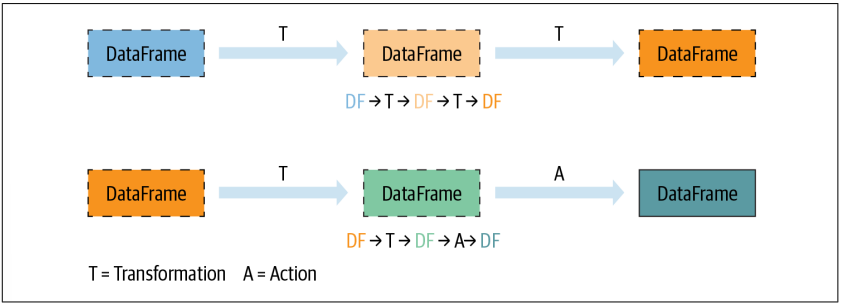

While lazy evaluation allows Spark to optimize your queries by peeking into your
chained transformations, lineage and data immutability provide fault tolerance.
Because Spark records each transformation in its lineage and the DataFrames are
immutable between transformations, it can reproduce its original state by simply
replaying the recorded lineage, giving it resiliency in the event of failures.


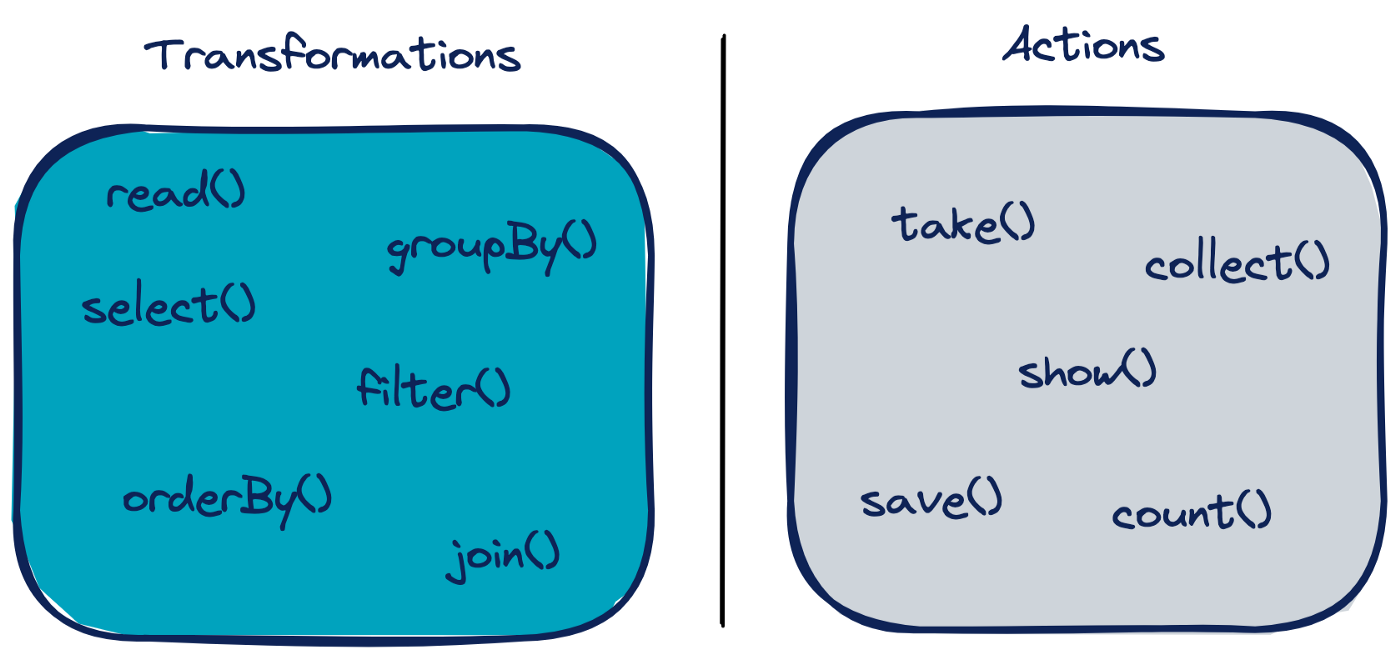

The actions and transformations contribute to a Spark query plan, which we will cover next week. Nothing in a query plan is executed until an action is invoked. The following example has two transformations, **read()** and **filter()**, and one action, **count()**. The action is what triggers the execution of all transformations recorded as part of the query execution
plan.

In [50]:
#we are searching for the word "Spark" inside the README.md (part of the spark's package), then count the number of times that it is repeated. 
#if you want to visualize what is inside the "spark-3.3.0-bin-hadoop3" directory, you can use the following command
#ls spark-3.3.0-bin-hadoop3

strings =spark.read.text("spark-3.3.0-bin-hadoop3/README.md")
filtered = strings.filter(strings.value.contains("Spark"))
filtered.count()


20